# Visualizing Zombi Simulations
Phylustrator is designed to handle complex evolutionary scenarios like those generated by **Zombi**.
We will visualize:
1. The **Species Tree** as a chronogram.
2. **Transfers** as curved links between branches.
3. **Losses and Duplications** as markers along the lineages.

In [7]:
type(specs)

list

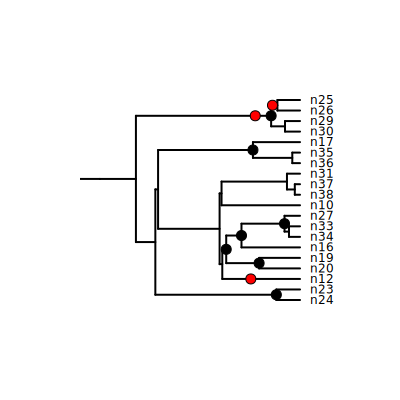

In [17]:
import phylustrator as ph

data = ph.parse_zombi("../examples/data/zombi/")   # folder that contains T/ and G/

style = ph.TreeStyle(width=400, height=400, leaf_size=0, node_size=0, branch_size=2)

v = ph.VerticalTreeDrawer(data.species_tree, style=style)
v.add_leaf_names()
v.draw()

shape_map = {"D":"square","L":"circle","P":"triangle","I":"triangle","O":"circle","E":"circle"}
color_map = {"D":"purple","L":"red","P":"green","I":"orange","O":"black","E":"gray"}

specs = ph.ZombiParser("").to_branch_shapes(data, shape_map=shape_map, color_map=color_map, size=10)

specs = specs[10:20]
v.add_branch_shapes(specs, orient=None, offset=0)

v.save_png("out/zombi.png", scale=3)
v.save_svg("out/zombi.svg")
v.d


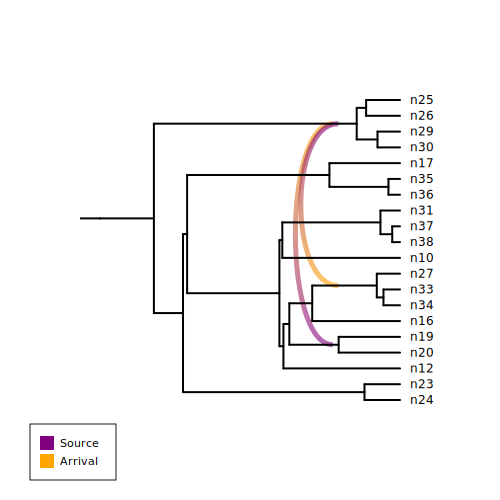

In [14]:
style = ph.TreeStyle(width=500, height=500, leaf_size=0, node_size=0, branch_size=2)
v = ph.VerticalTreeDrawer(data.species_tree, style=style)

data.transfers = data.transfers[data.transfers["family"] == "10"].copy()

v.plot_transfers(
    data.transfers,
    mode="time",
    filter_below=0.0,
    arc_intensity=50,
    curve_type="C",
)
v.add_leaf_names()
v.draw()
v.add_transfer_legend(low=0.0, high=1.0)
v.d


In [15]:
r_style = ph.TreeStyle(
    width=500,
    height=500,
    radius=200,
    degrees=360,
    rotation=-90,
    leaf_size=0,
    node_size=0,
    branch_size=2,
    branch_color="black",
    font_size=12,
    font_family="Arial",
)


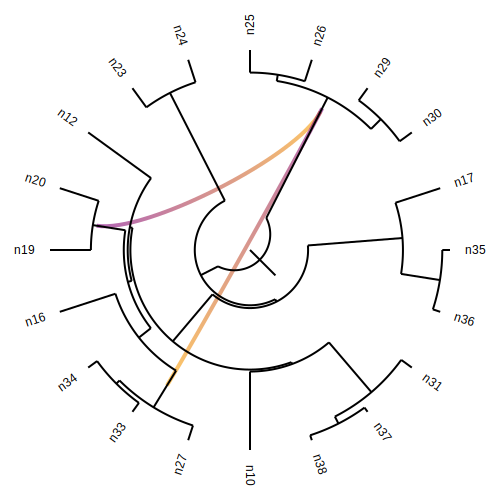

In [16]:
r = ph.RadialTreeDrawer(data.species_tree, style=r_style)

r.plot_transfers(
    data.transfers,
    mode="time",        # <- IMPORTANT (uses Zombi time)
    curve_type="C",
    filter_below=0.0,
    arc_intensity=50,
    stroke_width=4,
    opacity=0.6,
)

r.add_leaf_names()
r.draw()
r.d
